In [2]:
import pandas as pd
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import shutil

# Ignore all warnings
warnings.filterwarnings("ignore")

%matplotlib inline

plt.style.use("fivethirtyeight")

In [3]:
#Loading Training Dataset and Test Dataset
train_data = pd.read_csv("Dataset/train.csv")
test_data  = pd.read_csv("Dataset/test.csv")
train_data.head()
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
train_data = train_data.set_index('Id')
test_data = test_data.set_index('Id')

In [6]:
print(f"train data shape: {train_data.shape}")

print(f"test  data shape: {test_data.shape}")

train data shape: (1460, 80)
test  data shape: (1459, 79)


In [7]:
target = [col for col in train_data.columns if col not in test_data.columns][0]
print("The target variable is",target )

The target variable is SalePrice


In [8]:
print("Training Data Description")
display(train_data.describe())
print(f"\n{'_' * shutil.get_terminal_size().columns}\n") 
print("Testing Data Description")
display(test_data.describe())

Training Data Description


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000



________________________________________________________________________________

Testing Data Description


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [9]:
# All categorical nomial variables
cat_nom = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2',
           'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
           'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional',
           'GarageType', 'GarageFinish', 'MoSold', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

# All categorical ordinal variables
cat_ord = ['Utilities', 'LotShape', 'LandContour', 'LandSlope', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond',
           'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']
# All numerical continous variables
num_con = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
           '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
           '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

# All numerical discrete variables
num_dis = ['YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
           'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'YrSold']

# All numeric and categorical columns
numeric_columns = num_con + num_dis
categorical_columns  = cat_ord + cat_nom


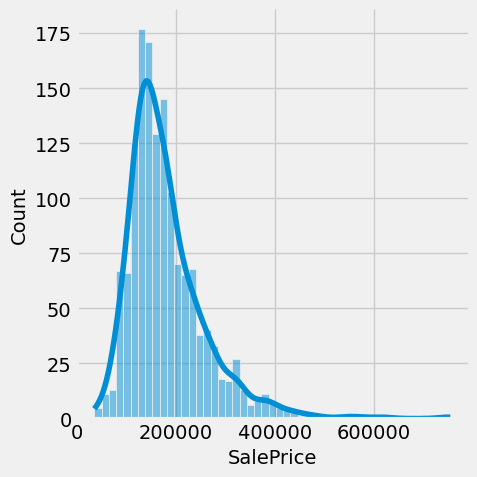

In [10]:
sns.displot(x=train_data['SalePrice'], kde=True)
plt.show()

In [12]:
train_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [13]:
print("Skewness",train_data['SalePrice'].skew())
print("Kurtosis",train_data['SalePrice'].kurt())

Skewness 1.8828757597682129
Kurtosis 6.536281860064529


In [19]:
def visualise_data(data, list_cols, plot_type, display_corr_score=False, **kwargs):

    if plot_type not in  ["scatterplot", "histplot", "countplot"]:
        print(f"Invalid plot_type specified: Can only show [scatterplot, histplot, countplot]")
        return

    num_plots = len(list_cols)
    num_cols = 4
    num_rows = -(-num_plots // num_cols) # Using negative signs here ensures that total rows are enough to accomodate all plots

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4*num_rows), **kwargs)

    # Loop through the list of columns (plots) and enumerate them along with their index (idx).
    for idx, column in enumerate(list_cols):
        row = idx // num_cols
        col = idx % num_cols
        ax = axes[row, col]
        
        if plot_type == "scatterplot":
            sns.scatterplot(x=data[column], y=data['SalePrice'], ax=ax)
            ax.set_ylabel(target, fontsize=14)
            ax.set_xlabel(column, fontsize=14)
            if display_corr_score == True:
                correlation = data[column].corr(data['SalePrice'])

                # Display the correlation score as text on the plot at a specific position.
                ax.text(.8, .9, f'corr: {correlation:.2f}', transform=ax.transAxes, fontsize=12, ha='center')

        elif plot_type == "histplot":
            sns.histplot(x=data[column], ax=ax)
            ax.set_xlabel(column, fontsize=14)
            ax.set_ylabel(" ")

        elif plot_type == "countplot":
            sns.countplot(x=data[column], ax=ax)

            # Rotate and align the x-axis tick labels for better readability.
            ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

            # set ylabel to emoty string
            ax.set_ylabel(" ")
            ax.set_xlabel(column, fontsize=14)
    for idx in range(num_plots, num_rows * num_cols):

        # Remove the subplot (axis) at the current index from the figure (fig).
        fig.delaxes(axes.flatten()[idx])

    # Set the figure title based on plot type
    if plot_type == "scatterplot":
        fig.suptitle(f"Scatterplot of Continuous Numerical features With {target}", fontsize=16)

    elif plot_type == "histplot":
        fig.suptitle("Histograms of Numerical Discrete features", fontsize=16)

    elif plot_type == "countplot":
        fig.suptitle("Countplot of Categorical features", fontsize=16)

    plt.subplots_adjust(hspace=0.5)
    plt.show()     
            

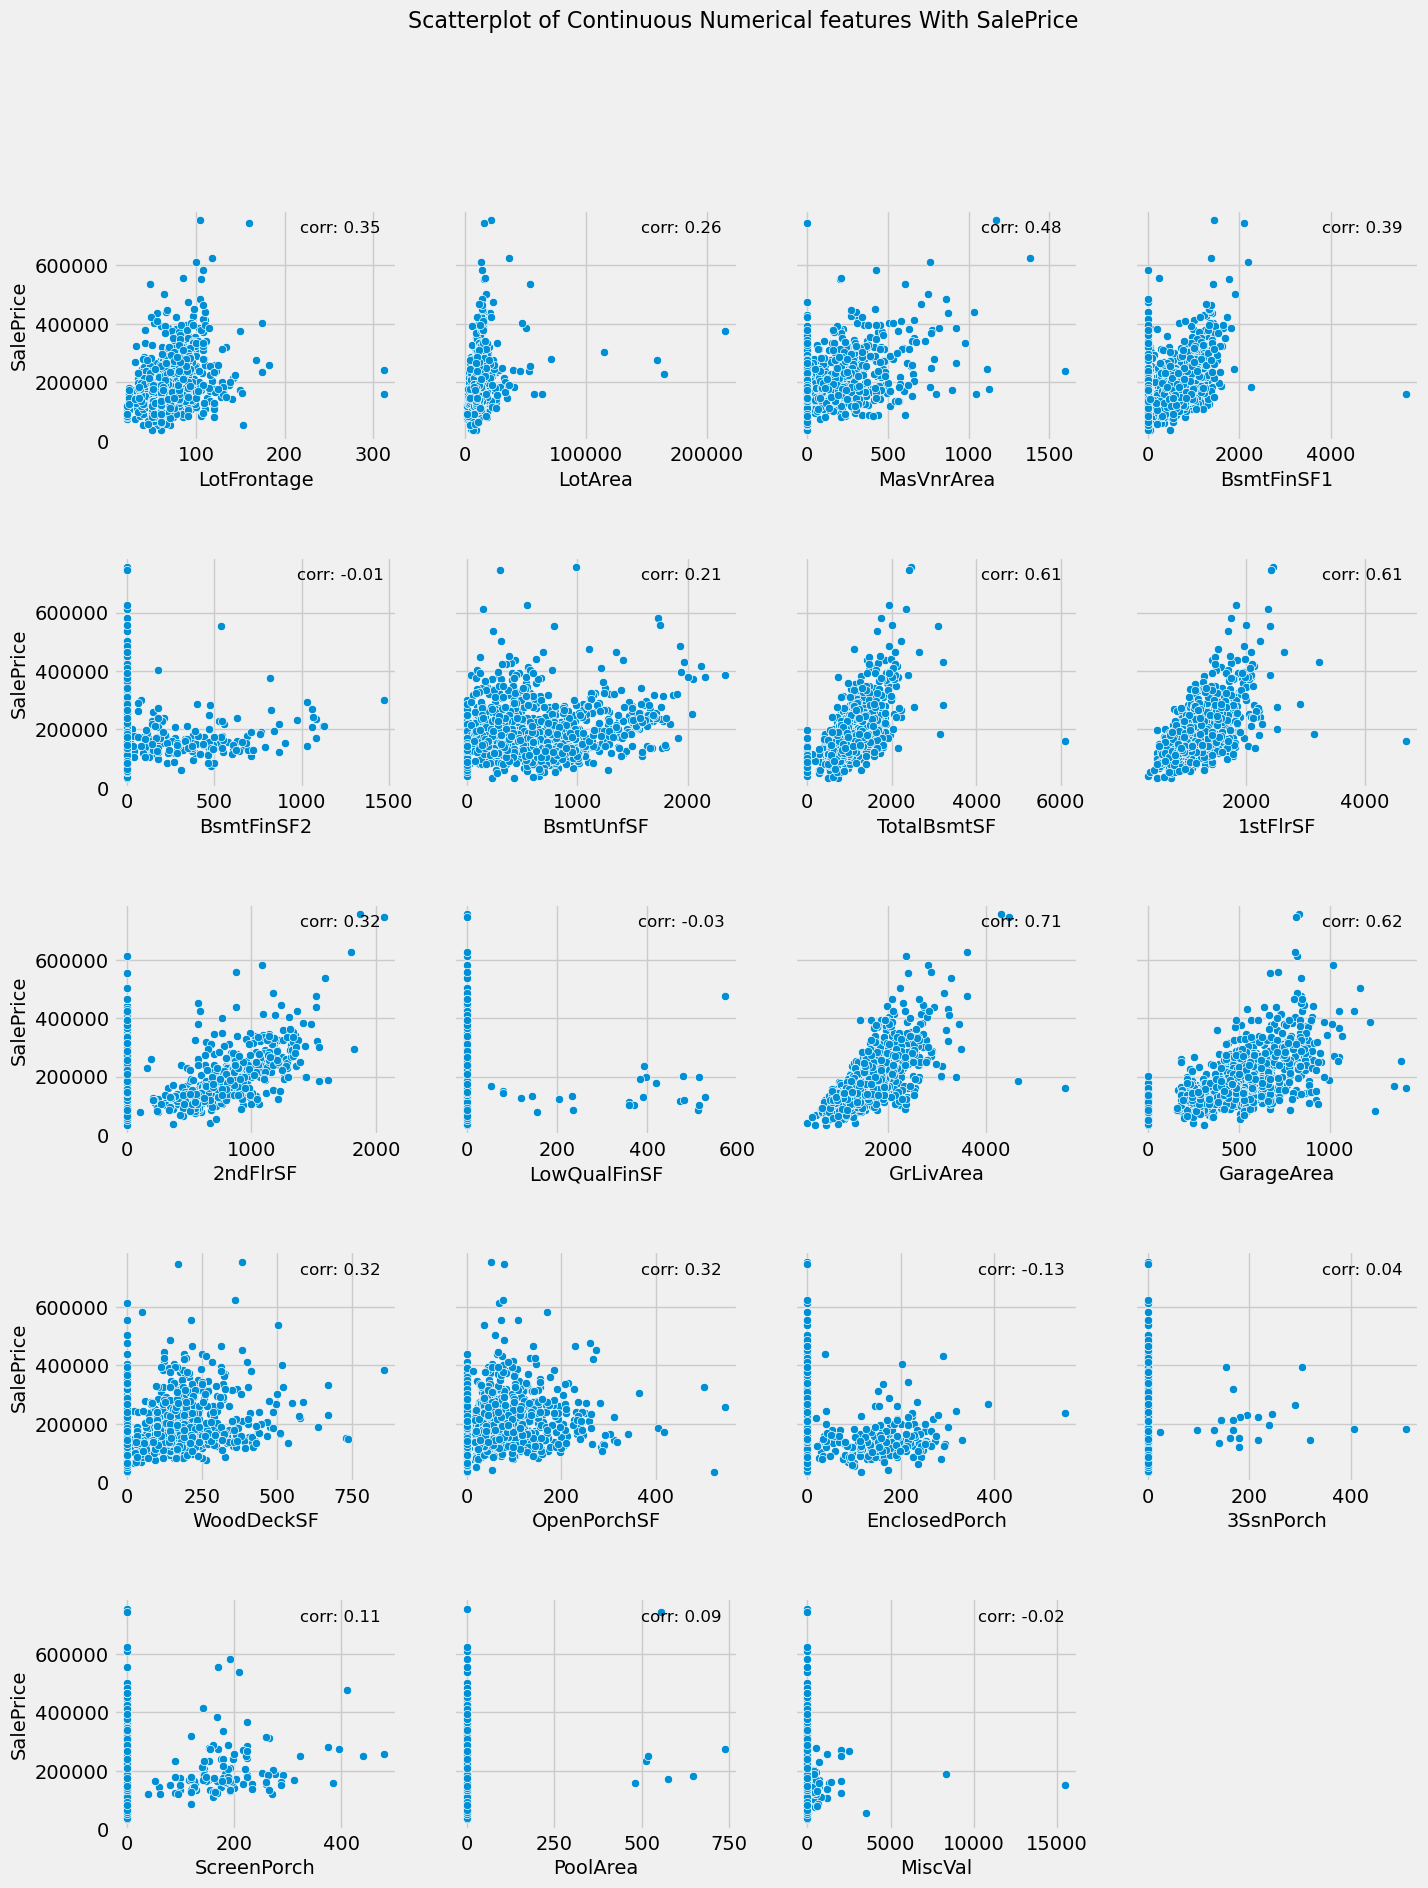

In [21]:
visualise_data(train_data, num_con, 'scatterplot', display_corr_score=True, sharey=True)